In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

#参数初始化
filename = 'business_circle.xls' #原始数据文件
standardizedfile = 'standardized.xls' #标准化后数据保存路径

data = pd.read_excel(filename, index_col = u'基站编号') #读取数据
data = (data - data.min())/(data.max() - data.min()) #离差标准化
data = data.reset_index()
data.to_excel(standardizedfile, index = False) #保存结果

#参数初始化
standardizedfile = 'standardized.xls' #标准化后的数据文件
data = pd.read_excel(standardizedfile, index_col = u'基站编号') #读取数据


In [11]:
data.head(5)

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,0.103865,0.856364,0.850539,0.169153
36903,0.263285,1.000000,0.725732,0.118210
36904,0.144928,0.740000,0.644068,0.038909
36905,0.082126,0.992727,0.993837,0.020031
36906,0.374396,0.867273,0.987673,0.102217


In [12]:
data.dtypes

工作日上班时间人均停留时间    float64
凌晨人均停留时间         float64
周末人均停留时间         float64
日均人流量            float64
dtype: object

In [13]:
data.shape

(431, 4)

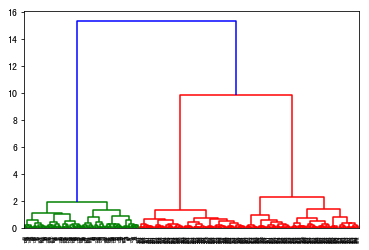

In [14]:
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
plt.show()

In [7]:
#层次聚类算法
#参数初始化
standardizedfile = 'standardized.xls' #标准化后的数据文件
k = 3 #聚类数
data = pd.read_excel(standardizedfile, index_col = u'基站编号') #读取数据

from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(data) #训练模型


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

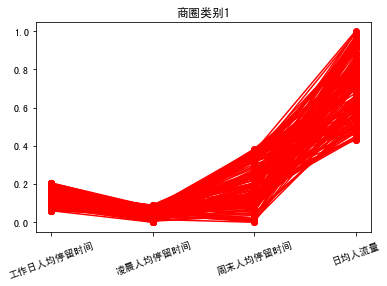

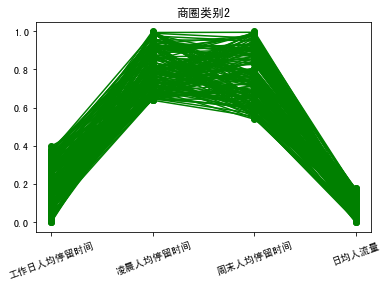

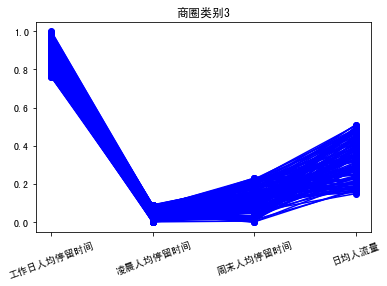

In [15]:
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

style = ['ro-', 'go-', 'bo-']
xlabels = [u'工作日人均停留时间', u'凌晨人均停留时间', u'周末人均停留时间', u'日均人流量']
pic_output = 'data/type_' #聚类图文件名前缀

for i in range(k): #逐一作图，作出不同样式
  plt.figure()
  tmp = r[r[u'聚类类别'] == i].iloc[:,:4] #提取每一类
  for j in range(len(tmp)):
    plt.plot(range(1, 5), tmp.iloc[j], style[i])
  
  plt.xticks(range(1, 5), xlabels, rotation = 20) #坐标标签
  plt.title(u'商圈类别%s' %(i+1)) #我们计数习惯从1开始
  plt.subplots_adjust(bottom=0.15) #调整底部
  plt.savefig(u'%s%s.png' %(pic_output, i+1)) #保存图片
